In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt

from utils import multivariate_normal

In [4]:
xs = np.loadtxt('data/old_faithful.txt')
print(xs.shape)

(272, 2)


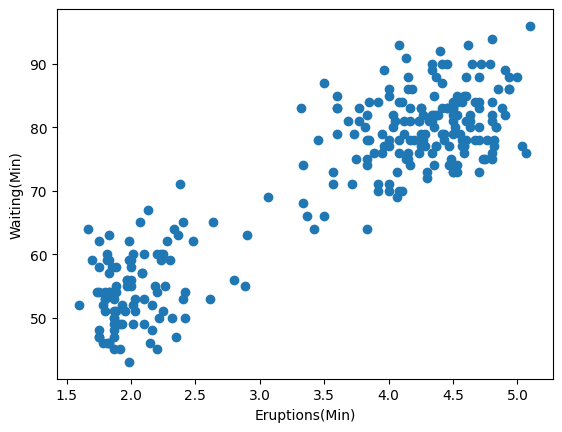

In [6]:
plt.scatter(xs[:, 0], xs[:, 1])
plt.xlabel('Eruptions(Min)')  # 噴出した時間 (分)
plt.ylabel('Waiting(Min)')  # 噴出の間隔 (分)
plt.show()

In [7]:
mus = np.array([
    [2.0, 54.50],
    [4.3, 80.0]
])
covs = np.array([
    [
        [0.07, 0.44],
        [0.44, 33.7]
    ],
    [
        [0.17, 0.94],
        [0.94, 36.0]
    ]
])
phis = np.array([0.35, 0.65])

In [17]:
def sample():
    z = np.random.choice(2, p=phis)
    mu, cov = mus[z], covs[z]
    x = np.random.multivariate_normal(mu, cov)
    return x

In [20]:
N = 500
xs = np.zeros((N, 2))
for i in range(N):
    xs[i] = sample()

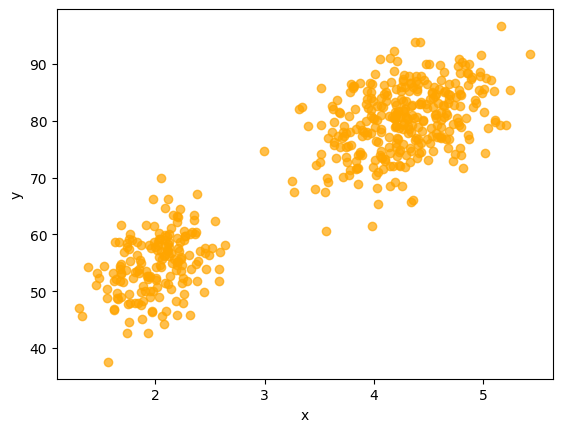

In [21]:
plt.scatter(xs[:, 0], xs[:, 1], color='orange', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y

In [24]:
xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)

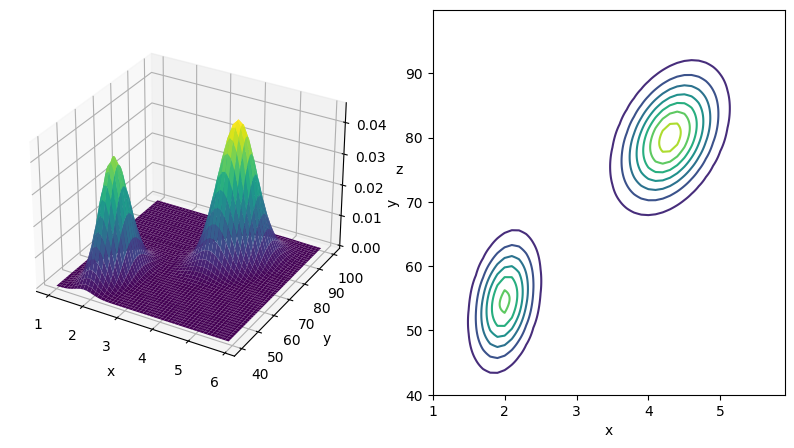

In [25]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()